# EDA

#### Importing the necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
pd.options.display.max_columns = 80
pd.set_option("display.max_rows", 600)

#### Loading Data

In [2]:
df = pd.read_csv('laliga_prepared.csv', infer_datetime_format = True)

In [4]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

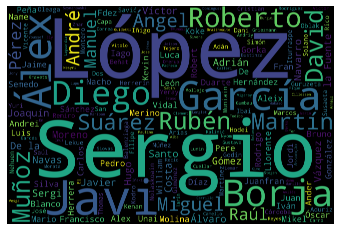

In [13]:

text = str(df.Name)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=7500,
    height=5000,
    margin=20).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


(-0.5, 999.5, 999.5, -0.5)

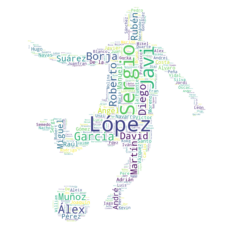

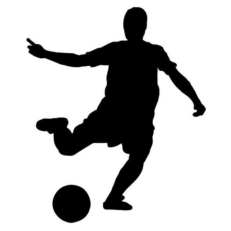

In [24]:
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

wonderland/255fk.jpg
soc_mask = np.array(Image.open(path.join(d, "soc2.jpg")))


wc = WordCloud(background_color="white", max_words=500, mask=soc_mask)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "soc2.jpg"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
#plt.show()

In [ ]:
#Number of teams in La Liga 

In [8]:
df['Team'].nunique()

20

In [28]:
#Number of Players per team

num_play = df.groupby('Team')['Name'].count()

In [45]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Team', 'Player Number'],
                                          line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
                 cells=dict(values=[num_play.index, num_play.values],
                            line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
                     ])
fig.show()


In [55]:
#Number of Players per team per position

In [109]:
df_num_pos = df.groupby(['Team', 'Position'], as_index=False)['Name'].count()

In [110]:
df_num_pos

,Team,Position,Name
0,Athletic Club,Defender,7
1,Athletic Club,Forward,5
2,Athletic Club,Goalkeeper,4
3,Athletic Club,Midfielder,13
4,Atlético de Madrid,Defender,11
5,Atlético de Madrid,Forward,7
6,Atlético de Madrid,Goalkeeper,3
7,Atlético de Madrid,Midfielder,11
8,CD Leganés,Defender,10
9,CD Leganés,Forward,6


In [118]:
#Percentage of Players per Position

In [119]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels= df_num_pos.Position,
                             values=df_num_pos.Name, hole=.6)])
fig.show()